# Daily Notebook #1

### Current State

- Current Course: Data Analyst in Python: Data Manipulation
- Todays Notes: learned various basics of data manipulation. I am already comfortable with most of it, but using the notebook today to practice.



### Goals

- The main goal is to code/analyze data everyday. Over the years I have chipped away at schooling and courses, but dont keep up to date with skills as much as I should. 
- Also: Want to get more comfortable in the notebooks/github process. have not used github very much, want to change that with this project
- Overall, keeping the notebooks/formatting very quick and simple. The goal is to code, not to format every single detail.

### Dataset for today

 Choclate Sales Data - https://www.kaggle.com/datasets/atharvasoundankar/chocolate-sales

Reason for choosing - Wanted a general sales type dataset to work with to practice all of the pandas that im brushing up on

### Code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#reading in data
choc_sales = pd.read_csv("Chocolate Sales.csv")

In [3]:
#getting a feel for the data with various high level pandas functions
choc_sales.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [4]:
choc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


Noting here that we are going to have to clean up the date to a standard format (Year - Month - Day), and we are going to have to clean up the Amount column to a numerical values

In [5]:
choc_sales.shape

(1094, 6)

### Plan

- Clean the amount column
- Clean the date column
- Use ChatGPT to create some practice questions for me, and hopefully expand where I can

### Data Cleaning

In [6]:
# Cleaning the Date column

#had to research to_datetime and figured out you pass the current format of the string, and pandas will do the conversion
#used chat gpt to ask for a better way to writemy replace. I was chaining the replace and some some deprication errors. The regex syntax makes sense to me. 
choc_sales['Date'] = pd.to_datetime(choc_sales['Date'], format = '%d-%b-%y')
choc_sales['Amount'] = pd.to_numeric(choc_sales['Amount'].str.replace(r'[$,]', '', regex = True))

In [7]:
choc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   int64         
 5   Boxes Shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 51.4+ KB


### Data Analysis

Summary Statistics

In [8]:
#High level summary stats for numberical columns
choc_sales.describe()

,Amount,Boxes Shipped
count,1094.000000,1094.000000
mean,5652.308044,161.797989
std,4102.442014,121.544145
min,7.000000,1.000000
25%,2390.500000,70.000000
50%,4868.500000,135.000000
75%,8027.250000,228.750000
max,22050.000000,709.000000


In [9]:
#Thinking of higher level metrics/KPIs I wanted to start exploring our overall totals and also came up with rev per box. 
# Rev per box seems like it could be a possible metric this company uses, where higher rev per box could go up or down depending on sales of more premium product
total_sales = choc_sales['Amount'].sum()
total_boxes = choc_sales['Boxes Shipped'].sum()
average_sales_per_box = total_sales / total_boxes

print("Total Sales:", f'${total_sales:,.0f}')
print("Total Boxes sold:", f'{total_boxes:,.0f}')
print("Revenue per Box:", f'${average_sales_per_box:.0f}')

Total Sales: $6,183,625
Total Boxes sold: 177,007
Revenue per Box: $35


In [10]:
#Next I want to practice some cum calculations. WIll do sales and # of boxes sold charts to see how we were selling over time
#Need to setup dataframe as sorted to get this effect
choc_sales = choc_sales.sort_values('Date', ascending = True)
choc_sales['Cum Sales'] = choc_sales['Amount'].cumsum()
choc_sales['Cum Boxes'] = choc_sales['Boxes Shipped'].cumsum()

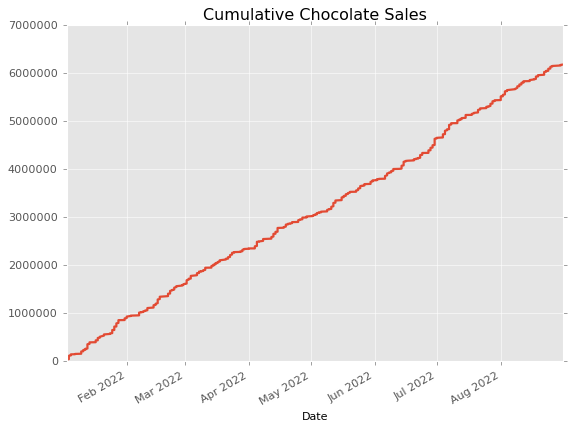

In [27]:
#matplotlib knowledge is pretty rough, but the jist is sales are super linear and clean - not a ton of huge jumps
plt.style.use('ggplot')
ax = choc_sales.plot.line(x='Date', y = 'Cum Sales')
ax.set_title('Cumulative Chocolate Sales')
ax.legend().remove()
ax.grid(True)
plt.show()

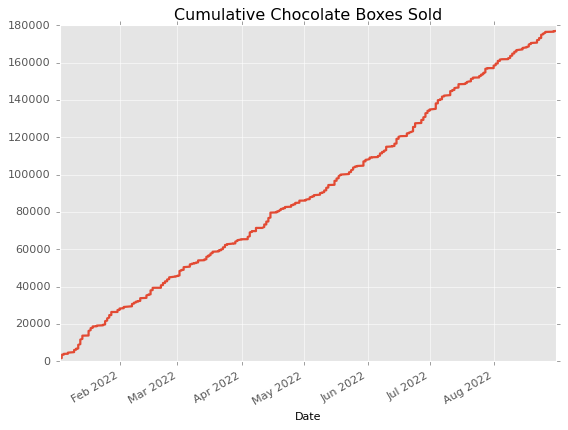

In [30]:
#Same is true for boxes sold
plt.style.use('ggplot')
ax = choc_sales.plot.line(x='Date', y = 'Cum Boxes')
ax.set_title('Cumulative Chocolate Boxes Sold')
ax.legend().remove()
ax.grid(True)
plt.show()

In [55]:
#creating a report of sales metrics per salesman
#Very interesting groupby syntax I learned was you can name columns, note the agg column, and the aggregation to create multiple columns
sales_df = choc_sales.groupby('Sales Person')[['Amount', 'Boxes Shipped']].agg(
    total_sales = ('Amount', 'sum'), 
    total_boxes = ('Boxes Shipped', 'sum'), 
    sales_count = ('Amount', 'count')
).reset_index()

#purpose is to show how often salesman are selling premium products. If lots of sales, but rev per box low, then they are selling lots of low priced product or at discounts
sales_df['rev_per_box'] = round(sales_df['total_sales'] / sales_df['total_boxes'])

#purpose is to again a sales metric of sales performance. we want to differentiate between low amounts of sales but sales are high amounts, to high # of sales but lots of low amounts
sales_df['rev_per_sale'] = round(sales_df['total_sales'] / sales_df['sales_count'])

#Overall the sales metric could be built into KPIs for each salesman to hit a bonus etc

In [56]:
sales_df

,Sales Person,total_sales,total_boxes,sales_count,rev_per_box,rev_per_sale
0,Andria Kimpton,201747,6448,39,31.0,5173.0
1,Barr Faughny,258713,6366,43,41.0,6017.0
2,Beverie Moffet,278922,9214,50,30.0,5578.0
3,Brien Boise,312816,8102,53,39.0,5902.0
4,Camilla Castle,196616,5374,32,37.0,6144.0
5,Ches Bonnell,320901,7522,48,43.0,6685.0
6,Curtice Advani,216461,7074,46,31.0,4706.0
7,Dennison Crosswaite,291669,8767,49,33.0,5952.0
8,Dotty Strutley,190624,6853,36,28.0,5295.0
9,Gigi Bohling,232666,6303,47,37.0,4950.0


### Things Learned and Ideas for next time

**Learned**
- Learned some new groupby stuff that made aggregating the data how I wanted much easier. Specifically with the custom columns and agg applied to that column.
- I can use regex in the replace method

**Ideas for next Time**
- Scoring/ranking system for sales. When determining performance I realized that just top sales alone did not tell the full story. I want to look into taking all the above data into account and create a performance score to determine the best performing sales person.

- Lots to learn still about the actual products, and countries in which products sold.

***More analysis ideas***
- Sales per country and product. 
- Best sales person per product and country
- Best value product (balance of popularity and price?)